In [2]:
import pandas as pd
# from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np

Goal analysis: to predict the mood of the next day for the subjects in the dataset (being the average of the mood values measured during that day

In [92]:
# Import as Dataframe
data = pd.read_csv('./Data/dataset_mood_smartphone.csv')
data = data.drop('Unnamed: 0', 1)
data['time'] = pd.to_datetime(data['time'])

# Create index with both time and var for later pivoting
# data.set_index(['time', 'variable'], drop=False, inplace=True)

print(data.head())

# Example for using partial string indexing 
data.loc[(data['time'] >= '2014-02') & (data['time'] < '2014-03')]

df = pd.DataFrame(np.nan,
                    index = pd.MultiIndex.from_product([data.id.unique(),dates], names = ["ID", "time"]),
                    columns= data.variable.unique())

# df.head(30)


/var/folders/ln/hr39t5bs24gbkcwvh1vvd_v00000gn/T/ipykernel_5581/2086509619.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Unnamed: 0', 1)


        id                time variable  value
0  AS14.01 2014-02-26 13:00:00     mood    6.0
1  AS14.01 2014-02-26 15:00:00     mood    6.0
2  AS14.01 2014-02-26 18:00:00     mood    6.0
3  AS14.01 2014-02-26 21:00:00     mood    7.0
4  AS14.01 2014-02-27 09:00:00     mood    6.0


In [102]:
# Inspect the dataset
unique_variables = data.variable.unique()
unique_users = data.id.unique()
all_dates = pd.date_range(start=data.time.min().round('D'), end=data.time.max().round('D'), freq='D')
print(f"Number of records: {len(data)}")
print(f"Number of attributes: {len(data.columns)}")
print(f"Attribute types:\n{data.dtypes}")
print(f"Ranges of values:\n{data['value'].describe()}")
print(f"Number of unique users:\n{len(unique_users)}")
print(f"Number of unique variables:\n{len(unique_variables)}")
print(f"Names of unique variables:\n{','.join(unique_variables)}")

# Get the minimum and maximum dates
min_date = data['time'].min()
max_date = data['time'].max()

# Print the date range
print('Date range:', min_date, 'to', max_date)

Number of records: 376912
Number of attributes: 4
Attribute types:
id                  object
time        datetime64[ns]
variable            object
value              float64
dtype: object
Ranges of values:
count    376710.000000
mean         40.665313
std         273.726007
min      -82798.871000
25%           2.025000
50%           7.029000
75%          29.356000
max       33960.246000
Name: value, dtype: float64
Number of unique users:
27
Number of unique variables:
19
Names of unique variables:
mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
Date range: 2014-02-17 07:00:52.197000 to 2014-06-09 00:00:00


In [74]:
stats_general = pd.DataFrame({"Records": len(data),
                   "Variables": len(unique_variables),
                   "Users": len(unique_users),
                   "Dates": len(all_dates)},
                   index=['Amount of unique values'])

print(stats_general.to_markdown())
# Create table for variables 
stats_variables = data.groupby('variable').describe()['value'][['count', 'mean', 'std', 'min', 'max']]
print(stats_variables.to_markdown())

|                         |   Records |   Variables |   Users |   Dates |
|:------------------------|----------:|------------:|--------:|--------:|
| Amount of unique values |    376912 |          19 |      27 |     113 |
| variable             |   count |        mean |        std |            min |       max |
|:---------------------|--------:|------------:|-----------:|---------------:|----------:|
| activity             |   22965 |   0.115958  |   0.186946 |      0         |     1     |
| appCat.builtin       |   91288 |  18.5383    | 415.989    | -82798.9       | 33960.2   |
| appCat.communication |   74276 |  43.3438    | 128.913    |      0.006     |  9830.78  |
| appCat.entertainment |   27125 |  37.5765    | 262.96     |     -0.011     | 32148.7   |
| appCat.finance       |     939 |  21.7553    |  39.2184   |      0.131     |   355.513 |
| appCat.game          |     813 | 128.392     | 327.145    |      1.003     |  5491.79  |
| appCat.office        |    5642 |  22.5789    | 4

/var/folders/ln/hr39t5bs24gbkcwvh1vvd_v00000gn/T/ipykernel_5581/989007153.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mood_monthly = mood_data.resample('W').mean()
/var/folders/ln/hr39t5bs24gbkcwvh1vvd_v00000gn/T/ipykernel_5581/989007153.py:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arousal_monthly = arousal_data.resample('W').mean()
/var/folders/ln/hr39t5bs24gbkcwvh1vvd_v00000gn/T/ipykernel_5581/989007153.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or sele

Text(0.5, 1.0, 'Arousal and Valence in 2014 from March to June')

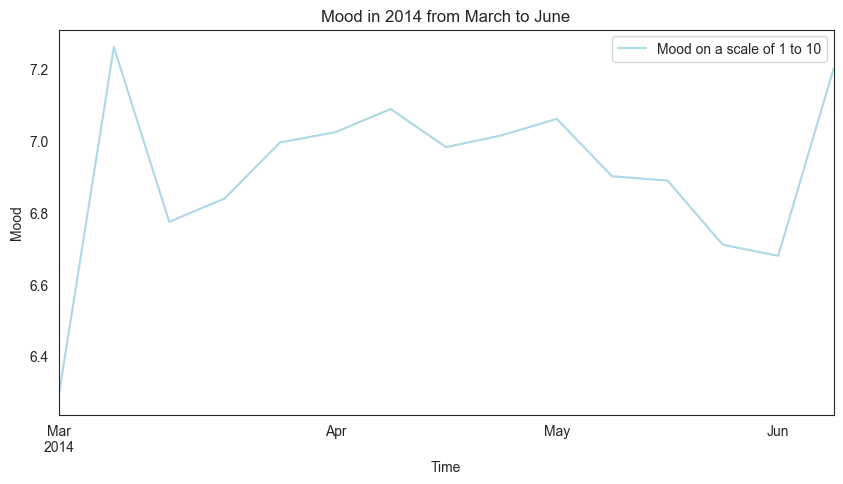

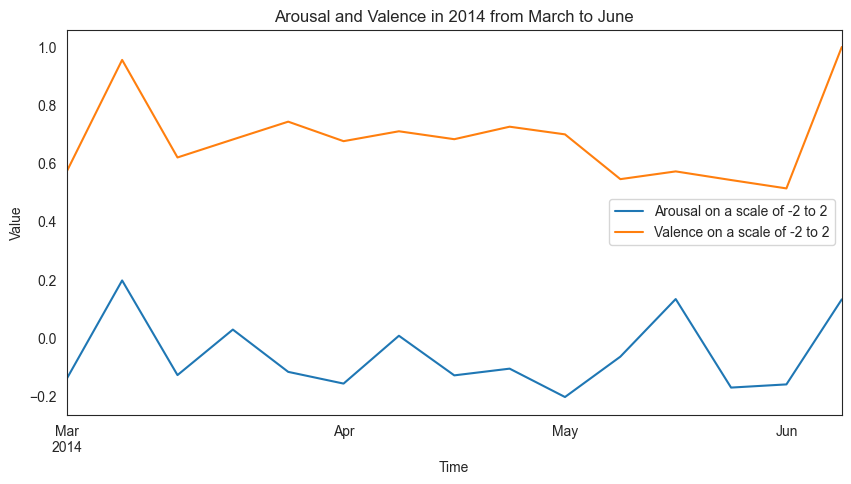

In [144]:
# Time plot: A time plot is a simple plot of the data against time. 
# It can help you identify trends, seasonality, and outliers in the data.
# Filter the DataFrame to only include the 'mood' variable
## Mood plot

# Set the seaborn style
sns.set_style('white')
sns.color_palette("Paired")

mood_data = data.loc[data['variable'] == 'mood']

# Set the 'time' column as the index
mood_data.set_index('time', inplace=True)
mood_monthly = mood_data.resample('W').mean()
# Create a line plot of mood over time
ax = mood_monthly.plot(kind='line', y='value', figsize=(10,5), color = 'darkcyan')

# Add labels and title
ax.legend(['Mood on a scale of 1 to 10'])
plt.xlabel('Time')
plt.ylabel('Mood')
plt.title('Mood in 2014 from March to June')

## Arousal and Valence plot 
# Filter the DataFrame to only include the 'arousal' and 'valence' variables
arousal_data = data.loc[data['variable'] == 'circumplex.arousal']
valence_data = data.loc[data['variable'] == 'circumplex.valence']

# Set the 'time' column as the index for both DataFrames
arousal_data.set_index('time', inplace=True)
valence_data.set_index('time', inplace=True)

# Resample the data by week, and take the mean of each week for both variables
arousal_monthly = arousal_data.resample('W').mean()
valence_monthly = valence_data.resample('W').mean()

# Create a line plot of both variables over time
ax = arousal_monthly.plot(kind='line', y='value', figsize=(10,5))
valence_monthly.plot(kind='line', y='value', ax=ax)

# Add a legend
ax.legend(['Arousal on a scale of -2 to 2', 'Valence on a scale of -2 to 2'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Arousal and Valence in 2014 from March to June')

# Plot the data as a scatter plot with a trend line
# Seasonal plot: A seasonal plot shows the seasonal patterns in the data. 
# It is a useful tool for identifying the time of the year when the data exhibits similar patterns.